<a href="https://colab.research.google.com/github/joepaul13/Principal-Component-Analysis/blob/main/PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
n_samples, height, width = faces_data.images.shape
x = faces_data.data
n_features = x.shape[1]
y = faces_data.target
n_classes = max(y) + 1

print("""
Number of Samples: {}
Height of each Image: {}
Width of each Image: {}
Number of Input Features: {}
Number of Output Classes: {}""".format(n_samples, height, width, n_features, n_classes))


Number of Samples: 400
Height of each Image: 64
Width of each Image: 64
Number of Input Features: 4096
Number of Output Classes: 40


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
                                                

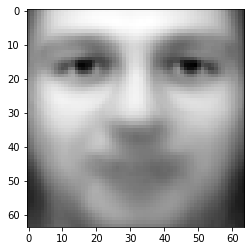

In [ ]:
mean_image = np.mean(x_train, axis = 0)   #Combination of all the faces
plt.imshow(mean_image.reshape((64,64)), cmap = plt.cm.gray)

In [ ]:
def plot_gallery(images, h, w, titles = None, n_row = 3, n_col = 4):
  plt.figure(figsize =(1.8*n_col, 2.4*n_row))
  plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
  for i in range(n_row*n_col):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(images[i].reshape((h,w)), cmap = plt.cm.gray)
    if titles != None:
      plt.title(titles[i], size = 12)
    plt.xticks(())
    plt.yticks(())

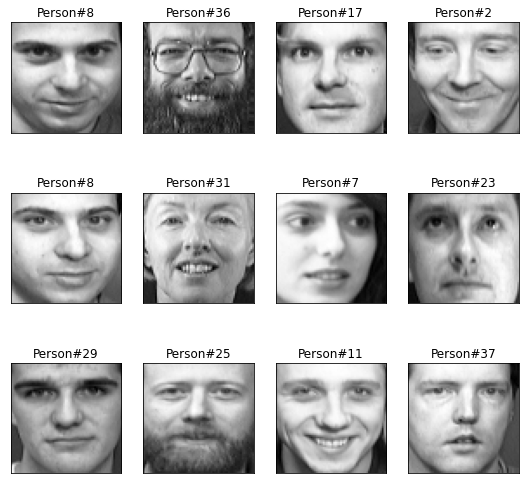

In [ ]:
chosen_images = x_train[:32]
chosen_labels = y_train[:32]
titles = ['Person#'+str(i) for i in chosen_labels]
plot_gallery(chosen_images, height, width, titles)

In [ ]:
n_components = 100

In [ ]:
pca = PCA(n_components = n_components, whiten = True).fit(x_train)

In [ ]:
eigenfaces = pca.components_.reshape((n_components, height, width))

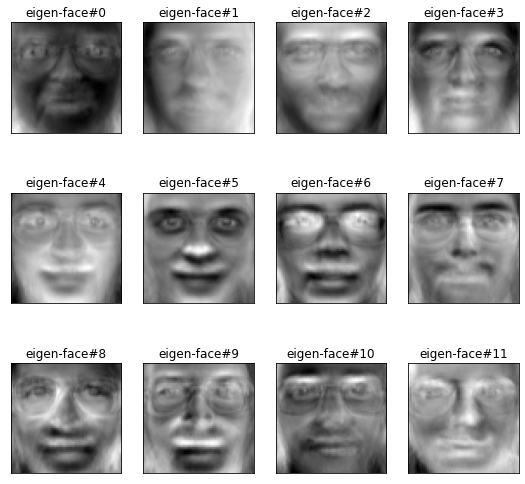

In [ ]:
titles = ['eigen-face#'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
print("Current Shape of Input Data Matrix:", x_train_pca.shape)

Current Shape of Input Data Matrix: (300, 100)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train_pca, y_train)

y_pred_test = knn_classifier.predict(x_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
  if y_pred_test[i] == y_test[i]:
    correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print('Accuracy', accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy 0.67
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.25      0.40         4
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         0
           4       0.25      1.00      0.40         1
           5       0.25      1.00      0.40         1
           6       1.00      0.50      0.67         4
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         4
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         2
          17 

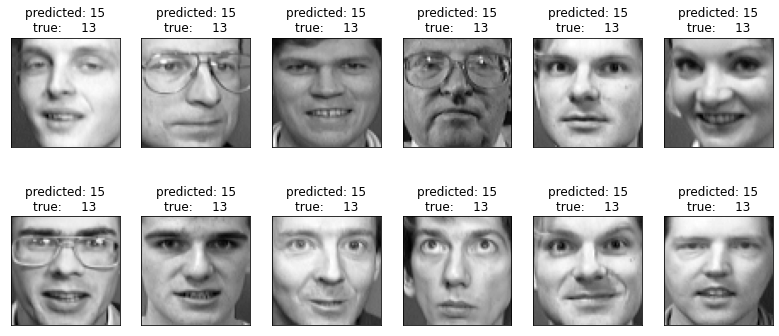

In [ ]:
def title(y_pred, y_test, target_names,i):
  pred_name = target_names[y_pred[i]].rsplit(' ',1)[-1]
  true_name = target_names[y_test[i]].rsplit(' ',1)[-1]
  return 'predicted: %s\ntrue:     %s' % (pred_name,true_name)
target_names = [str(element) for element in np.arange(40) + 1]
prediction_titles = [title(y_pred_test, y_test, target_names, 1) for i in range(y_pred_test.shape[0])]
plot_gallery(x_test, height, width, prediction_titles, n_row = 2, n_col = 6)
plt.show()